# Create a network with two population units

Here two spheres are placed with radie 200 micrometer using the density function ```(d < 200e-6)*1```. You can also use decaying densities ```exp(-d/200e-6)``` or any other function of ```d``` distance to the centre. The equation strings are evaluated using numexpr.

You specify what ```neuron_types``` are included in the population unit.

To see how to run SnuddaDetect and SnuddaPrune below in parallel using ipyparallel please see ```simple_network_parallel.ipynb```.

In short, type the following in a terminal window when you are in the ```examples/notebooks``` directory to start ipyparallel when it is installed:

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start 
```

In [1]:
import os
import numpy as np
from snudda.init import SnuddaInit

network_path = os.path.join("networks","population_unit_network")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(config_file=config_file, random_seed=12345)
cnc.define_striatum(num_dSPN=1000, num_iSPN=1000, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")

# The centre of the cube is [0.00354, 0.004645, 0.005081]
cnc.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                                unit_centre=np.array([0.00354, 0.004645, 0.005081]) -np.array([0,50e-6,150e-6]),
                                probability_function="(d < 200e-6)*1")
cnc.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                                unit_centre=np.array([0.00354, 0.004645, 0.005081]) -np.array([150e-6,0,0]),
                                probability_function="(d < 200e-6) * 1")
 
cnc.write_json(config_file)

Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing networks/population_unit_network/network-config.json


In [2]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

In the figure below you can see the two population units (cyan and brown), as well as the neurons not belonging to a population unit (grey).

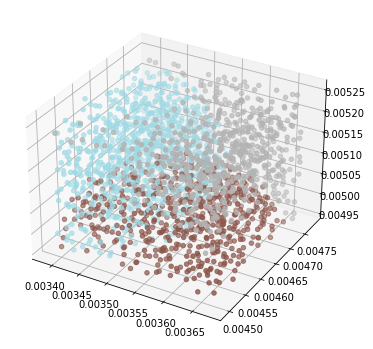

In [3]:
from snudda.plotting.plot_network import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(pos_file)

pn.plot_populations()

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [4]:
import os

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

from ipyparallel import Client
u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
rc = Client(url_file=u_file, timeout=120, debug=False)
d_view = rc.direct_view(targets='all')  # rc[:] # Direct view into clients

In [5]:
from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

importing SnuddaDetect from snudda.detect on engine(s)
HyperID 27 completed - 7587 synapses found (198.9 s)
HyperID 62 completed - 109678 synapses found (243.3 s)
HyperID 30 completed - 4881 synapses found (260.2 s)
HyperID 6 completed - 14880 synapses found (335.5 s)
HyperID 26 completed - 22143 synapses found (346.6 s)
HyperID 61 completed - 275939 synapses found (360.8 s)
HyperID 7 completed - 4444 synapses found (187.2 s)
HyperID 51 completed - 4756 synapses found (149.5 s)
HyperID 11 completed - 2343 synapses found (134.1 s)
HyperID 37 completed - 505848 synapses found (424.3 s)
Suppressing printouts for hyper voxels that complete in < 100 seconds.
HyperID 55 completed - 860 synapses found (126.3 s)
HyperID 57 completed - 654194 synapses found (465.5 s)
HyperID 35 completed - 712 synapses found (119.4 s)
HyperID 36 completed - 1337588 synapses found (555.8 s)
HyperID 56 completed - 1634590 synapses found (586.7 s)
HyperID 32 completed - 2772612 synapses found (651.1 s)
HyperID 31 

In [6]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

importing SnuddaPrune from snudda.prune on engine(s)
prune_synapses_parallel: No gapJunctions skipping pruning
Synapses before pruning: 14791947
Synapses after pruning: 837800 (5.66 % kept)
No gap junctions to prune.


**Important** Remember to shut down the kernel in this notebook when it finishes, so you can use the output file in other notebooks.